# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector



### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Business Objective

The primary business objective is to provide clear recommendations our client, a used car dealership, on what are the key factors that affect what a buyer is willing to pay for a used car. 

#### Situation Assessment

We have a dataset of 426K vehicles which contains descriptive information along with the selling price that we can use as basis for identifying what factors most determine the price someone is willing to pay.

#### Data Mining Goals

Given the dataset of 426K vehicle purchases which includes the features () along with the target selling price, determine which features are most important in determining the price paid for a used vehicle. The desired output is a list of the most important features in rank order.  

#### Project Plan

1) Aquire and explore the dataset for understanding
2) Prepare the data including cleaning and preprocessing
3) Try various modeling techniques in order to find the best model fit for the data
4) Evaluate model outputs and repeat steps 3 & 4 as needed
5) Determine Feature Importance
6) Document analysis findings

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Collect Initial Data
Initial Data Collection
Report
Describe Data
Data Description
Report
Explore Data
Data Exploration
Report
Verify Data Quality
Data Quality Report

#### Collect Initial Data

In [2]:
vehicles = pd.read_csv('./data/vehicles.csv')
vehicles.shape

(426880, 18)

#### Data Description


##### Dataset contains 426,880 rows and includes the following 18 columns: 

In [3]:
vehicles.columns.tolist()

['id',
 'region',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

#### Data Exploration

##### Sample of the Data

In [4]:
vehicles.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [5]:
vehicles.tail()

id   region  price    year manufacturer  \
426875  7301591192  wyoming  23590  2019.0       nissan   
426876  7301591187  wyoming  30590  2020.0        volvo   
426877  7301591147  wyoming  34990  2020.0     cadillac   
426878  7301591140  wyoming  28990  2018.0        lexus   
426879  7301591129  wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
426875         maxima s sedan 4d      good  6 cylinders     gas   32226.0   
426876  s60 t5 momentum sedan 4d      good          NaN     gas   12029.0   
426877          xt4 sport suv 4d      good          NaN  diesel    4174.0   
426878           es 350 sedan 4d      good  6 cylinders     gas   30112.0   
426879  4 series 430i gran coupe      good          NaN     gas   22716.0   

       title_status transmission                VIN drive size       type  \
426875        clean        other  1N4AA6AV6KC367801   fwd  NaN      sedan   
426876        clean        other  7JR102FKXLG042696   fwd  NaN      sedan   
426877        clean        other  1GYFZFR46LF088296   NaN  NaN  hatchback   
426878        clean        other  58ABK1GG4JU103853   fwd  NaN      sedan   
426879        clean        other  WBA4J1C58KBM14708   rwd  NaN      coupe   

       paint_color state  
426875         NaN    wy  
426876         red    wy  
426877       white    wy  
426878      silver    wy  
426879         NaN    wy

##### Identify columns with missing values

In [6]:
vehicles.isna().any()

id              False
region          False
price           False
year             True
manufacturer     True
model            True
condition        True
cylinders        True
fuel             True
odometer         True
title_status     True
transmission     True
VIN              True
drive            True
size             True
type             True
paint_color      True
state           False
dtype: bool

##### Determine data types and non-null rows for each column along with whether they are numerical or categorical

In [7]:
vehicles.info()

numerical_columns_selector = make_column_selector(dtype_exclude=object)
categorical_columns_selector = make_column_selector(dtype_include=object)

numerical_columns = numerical_columns_selector(vehicles)
categorical_columns = categorical_columns_selector(vehicles)
print (f'Numerical Columns: {numerical_columns}')
print (f'Categorical Columns: {categorical_columns}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

##### Explore Relationship of Numerical Columns
* The columns are not highly correlated

In [8]:
vehicles_corr = vehicles[numerical_columns].corr()
print(vehicles_corr)

                id     price      year  odometer
id        1.000000 -0.002779 -0.059040  0.010721
price    -0.002779  1.000000 -0.004925  0.010032
year     -0.059040 -0.004925  1.000000 -0.157215
odometer  0.010721  0.010032 -0.157215  1.000000


<AxesSubplot:>

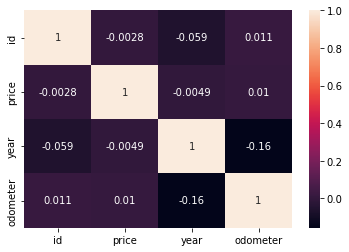

In [9]:
sns.heatmap(vehicles_corr,annot=True)

##### The number of unique values for each feature are as follows:

In [10]:
vehicles.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

##### The unique values for each feature with a relatively small number of unique values are:

In [11]:
for col in vehicles[vehicles.columns[[3,4,6,7,8,10,11,13,14,15,16,17]]]:
  print(col, vehicles[col].unique())

year [  nan 2014. 2010. 2020. 2017. 2013. 2012. 2016. 2019. 2011. 1992. 2018.
 2004. 2015. 2001. 2006. 1968. 2003. 2008. 2007. 2005. 1966. 2009. 1998.
 2002. 1999. 2021. 1997. 1976. 1969. 1995. 1978. 1954. 1979. 1970. 1974.
 1996. 1987. 2000. 1955. 1960. 1991. 1972. 1988. 1994. 1929. 1984. 1986.
 1989. 1973. 1946. 1933. 1958. 1937. 1985. 1957. 1953. 1942. 1963. 1977.
 1993. 1903. 1990. 1965. 1982. 1948. 1983. 1936. 1932. 1951. 1931. 1980.
 1967. 1971. 1947. 1981. 1926. 1962. 1975. 1964. 1934. 1952. 1940. 1959.
 1950. 1930. 1956. 1922. 1928. 2022. 1901. 1941. 1924. 1927. 1939. 1923.
 1949. 1961. 1935. 1918. 1900. 1938. 1913. 1916. 1943. 1925. 1921. 1915.
 1945. 1902. 1905. 1920. 1944. 1910. 1909.]
manufacturer [nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover

##### Exploration of Vehicle Region

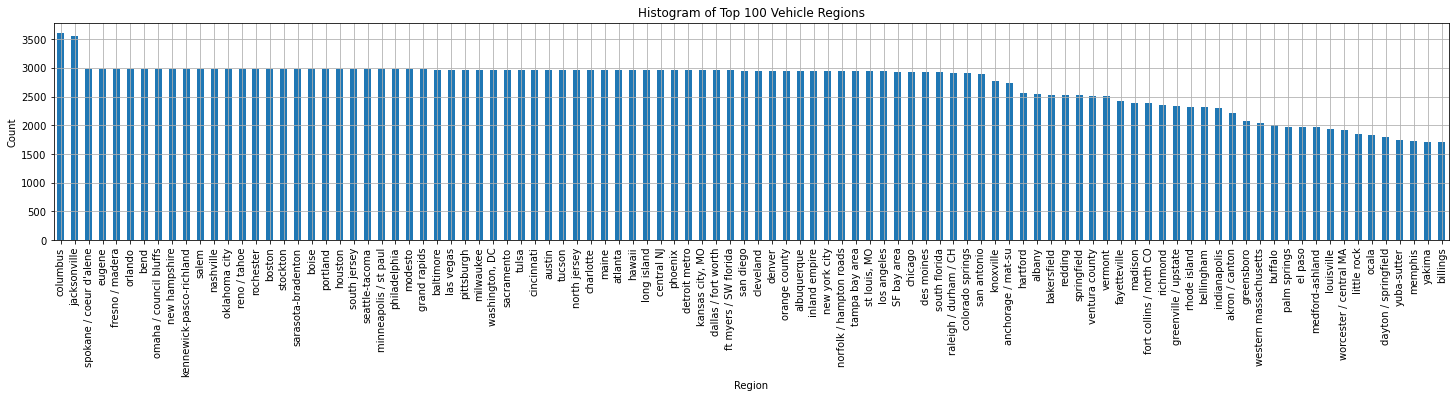

In [12]:
#There areover 400 regions in the dataset, limiting the results to the top 100
fig, ax = plt.subplots(figsize=(25, 4))
vehicles.region.value_counts()[:100].plot(kind="bar")
ax.set_title("Histogram of Top 100 Vehicle Regions")
ax.set_ylabel("Count")
ax.set_xlabel("Region")
ax.grid()
ax.tick_params(axis='x', rotation=90)
plt.show()

##### Exploration of Vehicle Price

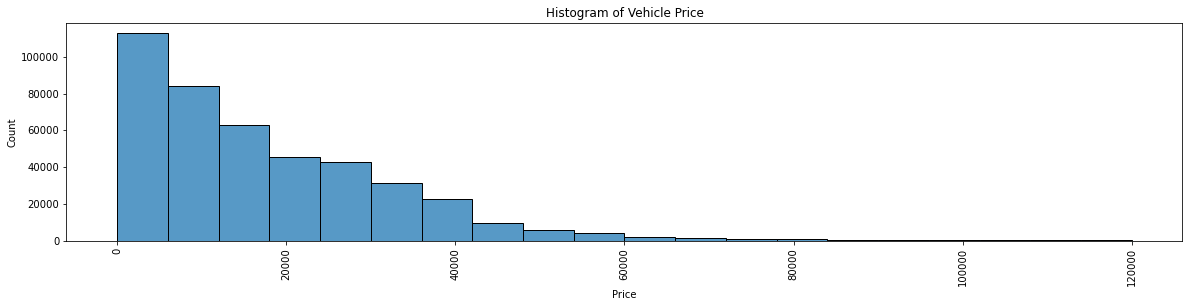

In [13]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.histplot(data = vehicles,x = 'price',bins=20,binrange=(0,120000),ax=ax)
ax.set_title("Histogram of Vehicle Price")
ax.set_ylabel("Count")
ax.set_xlabel("Price")
ax.tick_params(axis='x', rotation=90)
plt.show()

##### Exploration of Vehicle Year

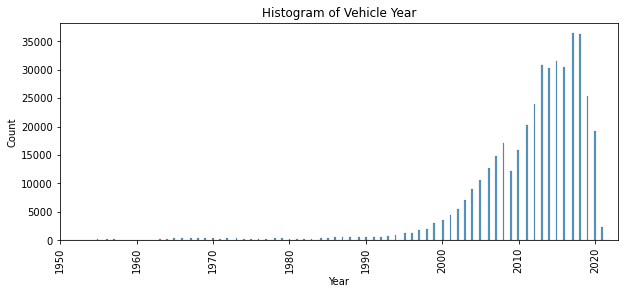

In [14]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.histplot(data = vehicles,x = 'year',ax=ax)
ax.set_title("Histogram of Vehicle Year")
ax.set_ylabel("Count")
ax.set_xlabel("Year")
ax.set_xlim(1950,2023)
ax.tick_params(axis='x', rotation=90)
plt.show()

##### Exploration of Vehicle Manufacturer

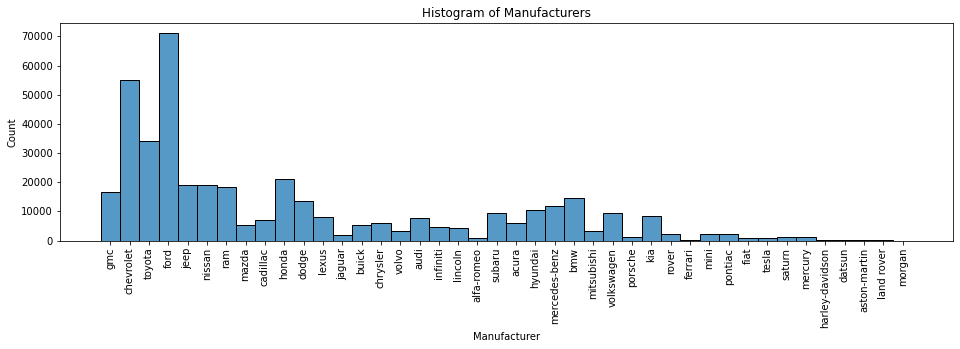

In [15]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(data = vehicles,x = 'manufacturer',ax=ax)
ax.set_title("Histogram of Manufacturers")
ax.set_ylabel("Count")
ax.set_xlabel("Manufacturer")
ax.tick_params(axis='x', rotation=90)
plt.show()


##### Exploration of Vehicle Model

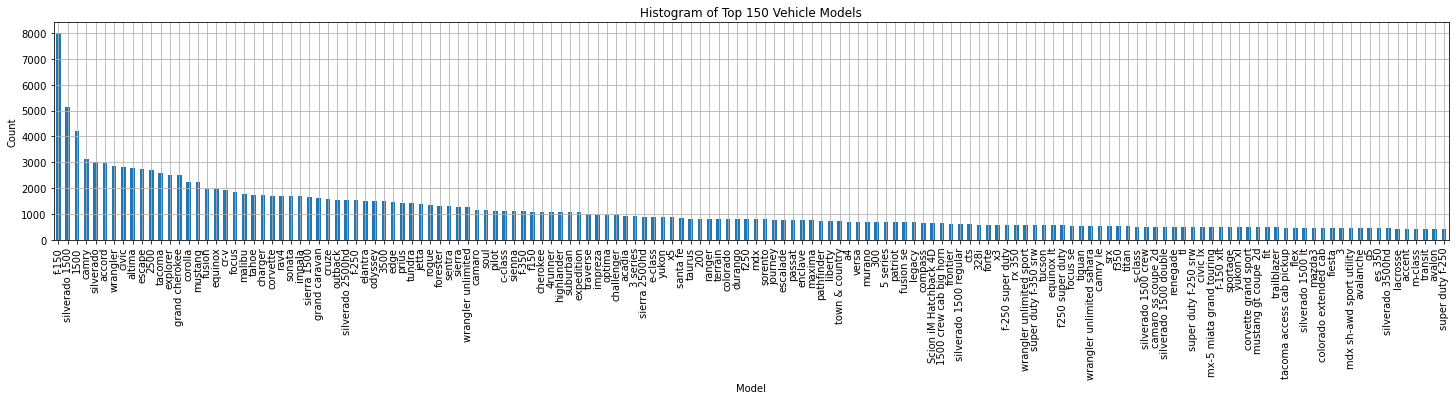

In [16]:
#There are over 29K models in the dataset, limiting the results to the top 150
fig, ax = plt.subplots(figsize=(25, 4))
vehicles.model.value_counts()[:150].plot(kind="bar")
ax.set_title("Histogram of Top 150 Vehicle Models")
ax.set_ylabel("Count")
ax.set_xlabel("Model")
ax.grid()
ax.tick_params(axis='x', rotation=90)
plt.show()

##### Exploration of Vehicle Condition

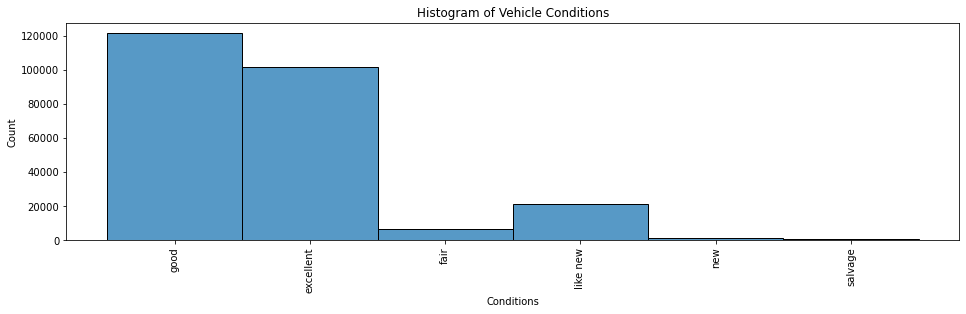

In [17]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(data = vehicles,x = 'condition',ax=ax)
ax.set_title("Histogram of Vehicle Conditions")
ax.set_ylabel("Count")
ax.set_xlabel("Conditions")
ax.tick_params(axis='x', rotation=90)
plt.show()

##### Exploration of Vehicle Cylinders

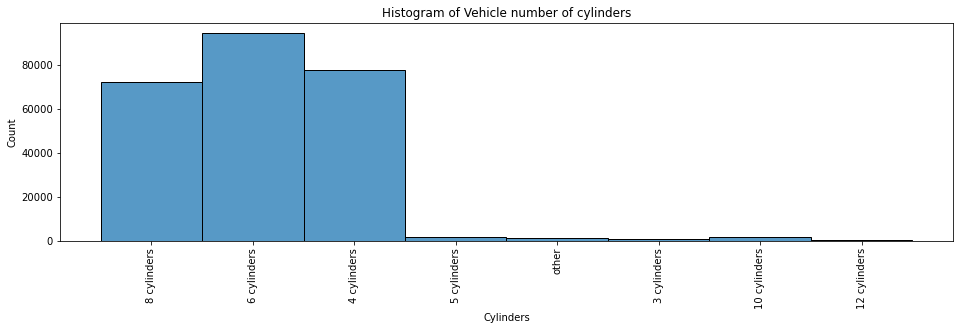

In [18]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(data = vehicles,x = 'cylinders',ax=ax)
ax.set_title("Histogram of Vehicle number of cylinders")
ax.set_ylabel("Count")
ax.set_xlabel("Cylinders")
ax.tick_params(axis='x', rotation=90)
plt.show()

##### Exploration of Vehicle Fuel Type

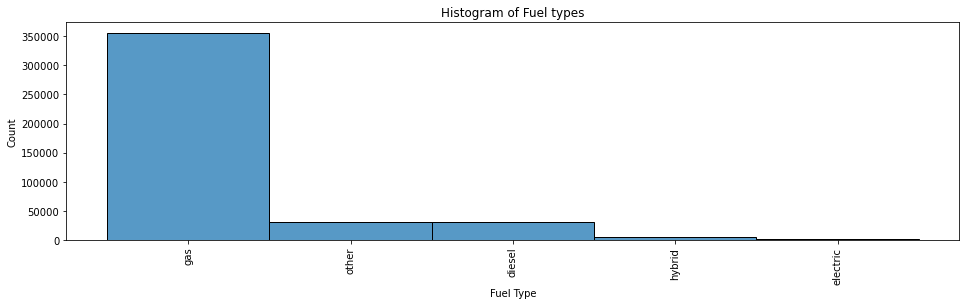

In [19]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(data = vehicles,x = 'fuel',ax=ax)
ax.set_title("Histogram of Fuel types")
ax.set_ylabel("Count")
ax.set_xlabel("Fuel Type")
ax.tick_params(axis='x', rotation=90)
plt.show()

##### Exploration of Vehicle Title Status

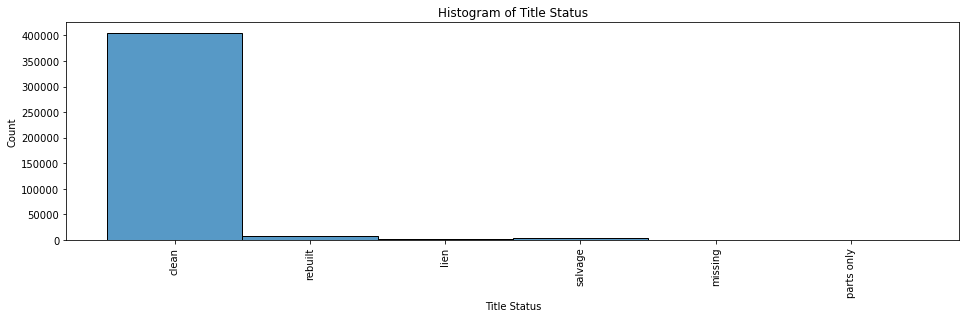

In [20]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(data = vehicles,x = 'title_status',ax=ax)
ax.set_title("Histogram of Title Status")
ax.set_ylabel("Count")
ax.set_xlabel("Title Status")
ax.tick_params(axis='x', rotation=90)
plt.show()

##### Exploration of Vehicle Transmission

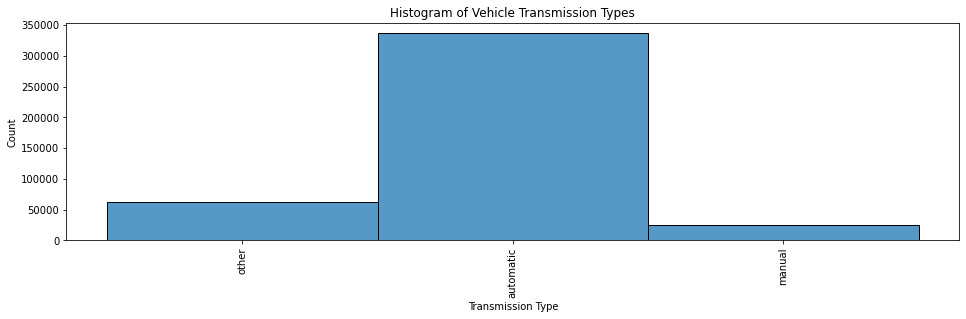

In [21]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(data = vehicles,x = 'transmission',ax=ax)
ax.set_title("Histogram of Vehicle Transmission Types")
ax.set_ylabel("Count")
ax.set_xlabel("Transmission Type")
ax.tick_params(axis='x', rotation=90)
plt.show()

##### Exploration of Vehicle drive type

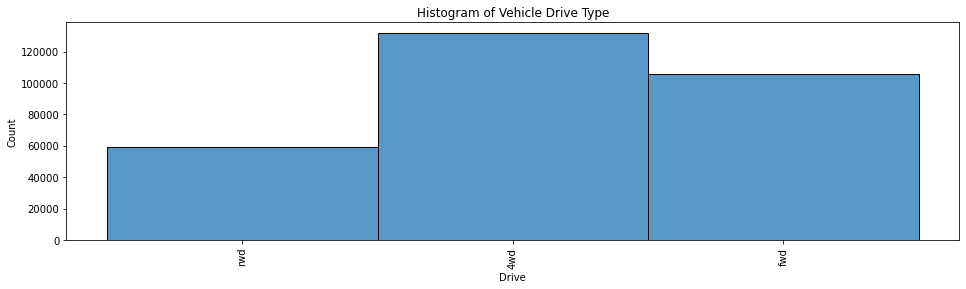

In [22]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(data = vehicles,x = 'drive',ax=ax)
ax.set_title("Histogram of Vehicle Drive Type")
ax.set_ylabel("Count")
ax.set_xlabel("Drive")
ax.tick_params(axis='x', rotation=90)
plt.show()

##### Exploration of Vehicle size

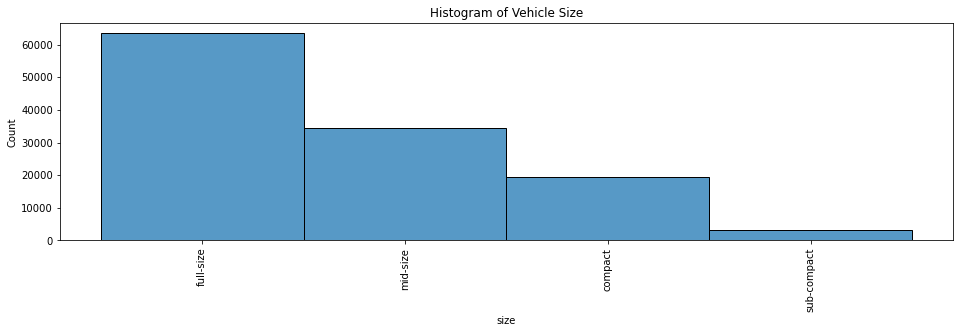

In [23]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(data = vehicles,x = 'size',ax=ax)
ax.set_title("Histogram of Vehicle Size")
ax.set_ylabel("Count")
ax.set_xlabel("size")
ax.tick_params(axis='x', rotation=90)
plt.show()

##### Exploration of Vehicle Type

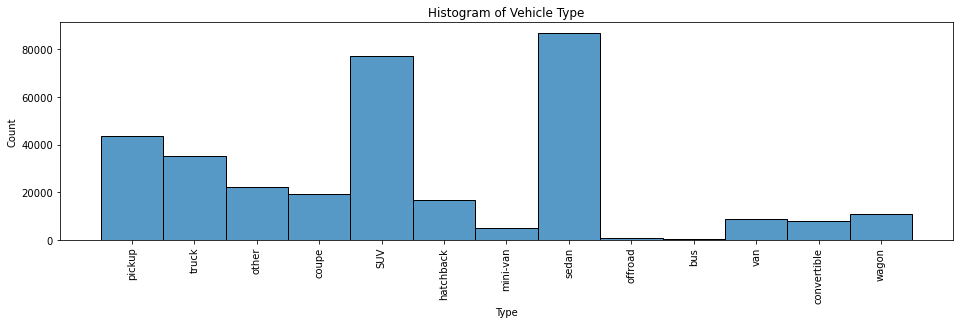

In [24]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(data = vehicles,x = 'type',ax=ax)
ax.set_title("Histogram of Vehicle Type")
ax.set_ylabel("Count")
ax.set_xlabel("Type")
ax.tick_params(axis='x', rotation=90)
plt.show()

##### Exploration of Vehicle Paint Color

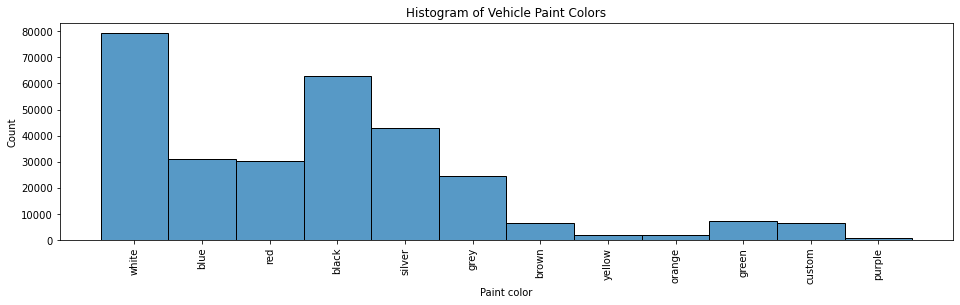

In [25]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(data = vehicles,x = 'paint_color',ax=ax)
ax.set_title("Histogram of Vehicle Paint Colors")
ax.set_ylabel("Count")
ax.set_xlabel("Paint color")
ax.tick_params(axis='x', rotation=90)
plt.show()

##### Exploration of Vehicle State

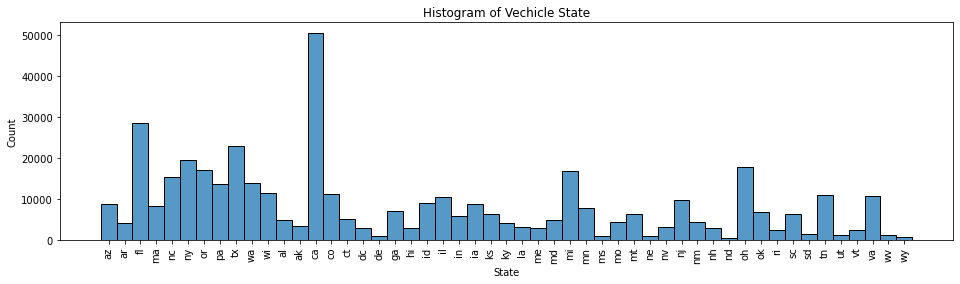

In [26]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(data = vehicles,x = 'state',ax=ax)
ax.set_title("Histogram of Vechicle State")
ax.set_ylabel("Count")
ax.set_xlabel("State")
ax.tick_params(axis='x', rotation=90)
plt.show()

Text(0.5, 0, 'State')

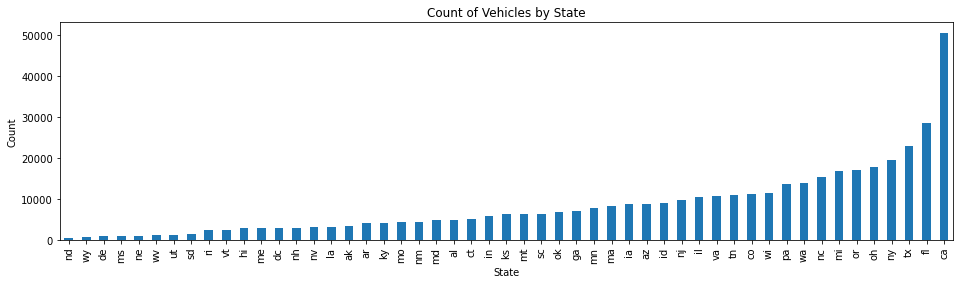

In [27]:
ax = vehicles.state.value_counts().sort_values().plot(kind = 'bar',figsize=(16,4))
ax.set_title("Count of Vehicles by State")
ax.set_ylabel("Count")
ax.set_xlabel("State")

##### Exploration of Vehicle Odometer Readings

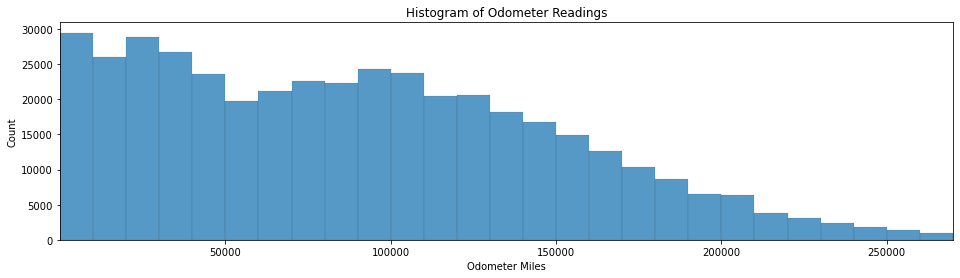

In [28]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.histplot(data = vehicles,x = 'odometer',binwidth=10000,ax=ax)
ax.set_title("Histogram of Odometer Readings")
ax.set_ylabel("Count")
ax.set_xlabel("Odometer Miles")
ax.set_xlim(1,270000)
plt.show()

#### Verify Data Quality

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

##### Data Selection

##### Drop the following columns:
*  id and VIN because they are not values people make buying decisions on unless in the case of the vin the vehicle is very unique
*  region because there is only a relatively small amount of data for each region

In [29]:
vehicles_df = vehicles.drop(['id','region','VIN'],axis=1)
vehicles_df.shape

(426880, 15)

##### Handle the remaining columns as follows:
* Price - drop values where price > 80,000 and < 1000 since typically represents special circumstances like not-running or high end vehicles 
* Year - only include vehicle year 2000 or newer since vehicles >20 years old have different considerations than modern ones
* Manufacturer - only include with 5000 or more sales in the dataset since since rare/ucommon vehicles are priced based on different considerations
* Model - only include with 500 or more sales in the dataset since rare/uncommon vehicles are priced based on different considerations
* Condition - A) Drop new and salvage since not enough examples in the dataset B) create an order - fair, good, excellent, like new, new 
* Cylinders - A) Keep 4,6,8 and drop the rest since they are uncommon in the dataset and real life B) create an order - 4,6,8
* Fuel - Keep only Gas since other options are not well represented in the dataset
* Odometer - Keep only 200,000 or below since vehicles above that are not common and typically are valued differently
* Title Status - Keep only Clean since there is limited data for the other values 
* Transmission - Keep only Automatic since there is limited data for the other values 
* drive - Keep all
* size - create an order - sub-compact,compact,mid-size,full-size
* type - Keep all except off-road and bus becuase they are uncommon and not represented well in the dataset
* paint - Keep paint colors with above 1,000 samples in the dataset since they are the most common
* State - Don't include in modeling since many states are not well represented in the dataset


In [30]:
#Create filters for manufacturers,models, paint_colors that are associated with the corresponding number of vehicle sales
manufacturer_gt5000 = vehicles_df.manufacturer.value_counts()>5000
manufacturer_gt5000 = manufacturer_gt5000.index[manufacturer_gt5000 == True]

model_gt500 = vehicles_df.model.value_counts()>500
model_gt500 = model_gt500.index[model_gt500 == True]

paint_gt1000 = vehicles_df.paint_color.value_counts()>1000
paint_gt1000 = paint_gt1000.index[paint_gt1000 == True]
#Create filter to keep most common values for these categories
condition_keep = ['fair','good','excellent','like new','new']
cylinders_keep = ['6 cylinders','4 cylinders','8 cylinders']
type_drop = ['bus','offroad','other']

In [31]:
vehicles_df = vehicles_df.query('price >= 1000 & price <=80000')
vehicles_df.shape

(378938, 15)

In [32]:
vehicles_df = vehicles_df.query('year >= 2000')
vehicles_df.shape

(354295, 15)

In [33]:
vehicles_df = vehicles_df.query('manufacturer in @manufacturer_gt5000.to_list()')
vehicles_df.shape

(317116, 15)

In [34]:
vehicles_df = vehicles_df.query('model in @model_gt500.to_list()')
vehicles_df.shape

(127732, 15)

In [35]:
vehicles_df = vehicles_df.query('condition in @condition_keep')
vehicles_df.shape

(61125, 15)

In [36]:
vehicles_df = vehicles_df.query('cylinders in @cylinders_keep')
vehicles_df.shape

(47817, 15)

In [37]:
vehicles_df = vehicles_df.query('fuel == "gas"')
vehicles_df.shape

(44398, 15)

In [38]:
vehicles_df = vehicles_df.query('odometer <= 200000')
vehicles_df.shape

(40727, 15)

In [39]:
vehicles_df = vehicles_df.query('title_status == "clean"')
vehicles_df.shape

(38141, 15)

In [40]:
vehicles_df = vehicles_df.query('transmission == "automatic"')
vehicles_df.shape

(34093, 15)

In [41]:
vehicles_df = vehicles_df.query('type not in @type_drop')
vehicles_df.shape

(33622, 15)

In [42]:
vehicles_df = vehicles_df.query('paint_color in @paint_gt1000.to_list()')
vehicles_df.shape

(28849, 15)

##### Data Cleansing

##### A review of remaining values after initial selection steps shows that there are not enough rows with size values relative to the rest of the columns to be useful so it is dropped

In [43]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28849 entries, 34 to 426784
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         28849 non-null  int64  
 1   year          28849 non-null  float64
 2   manufacturer  28849 non-null  object 
 3   model         28849 non-null  object 
 4   condition     28849 non-null  object 
 5   cylinders     28849 non-null  object 
 6   fuel          28849 non-null  object 
 7   odometer      28849 non-null  float64
 8   title_status  28849 non-null  object 
 9   transmission  28849 non-null  object 
 10  drive         27002 non-null  object 
 11  size          19480 non-null  object 
 12  type          26535 non-null  object 
 13  paint_color   28849 non-null  object 
 14  state         28849 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 3.5+ MB


In [44]:
vehicles_df = vehicles_df.drop('size',axis=1)
vehicles_df.shape

(28849, 14)

In [45]:
#Review the remaining unique values in dataset for the smaller columns
for col in vehicles_df[vehicles_df.columns[[2,3,4,5,6,7,8,9,10,11,12,13]]]:
  print(col, vehicles[col].unique())

manufacturer [nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']
model [nan 'sierra 1500 crew cab slt' 'silverado 1500' ... 'gand wagoneer'
 '96 Suburban' 'Paige Glenbrook Touring']
condition [nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
cylinders [nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
fuel [nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
odometer [    nan  57923.  71229. ... 172511.  94964.  26892.]
title_status [nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
transmission [nan 'other' 'automatic' 'manual']
drive [nan 'rwd' '4wd' 

##### Drop any remaining rows is NaN values to support model building

In [46]:
vehicles_df = vehicles_df.dropna()
vehicles_df.shape

(25175, 14)

In [47]:
vehicles_df.head()

price    year manufacturer           model  condition    cylinders fuel  \
34   35000  2019.0       toyota          tacoma  excellent  6 cylinders  gas   
59   14000  2012.0        honda         odyssey  excellent  6 cylinders  gas   
86    3000  2004.0     chrysler  town & country       good  6 cylinders  gas   
110   9500  2003.0     chrysler  town & country  excellent  6 cylinders  gas   
170  13950  2011.0       toyota          tacoma       good  4 cylinders  gas   

     odometer title_status transmission drive      type paint_color state  
34    43000.0        clean    automatic   4wd     truck        grey    al  
59    95000.0        clean    automatic   fwd  mini-van      silver    al  
86   176144.0        clean    automatic   fwd  mini-van      silver    al  
110   30376.0        clean    automatic   fwd  mini-van        blue    al  
170  151060.0        clean    automatic   rwd     truck      silver    al

In [48]:
#confirm equal row count of non-null values for remaining data
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25175 entries, 34 to 426784
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         25175 non-null  int64  
 1   year          25175 non-null  float64
 2   manufacturer  25175 non-null  object 
 3   model         25175 non-null  object 
 4   condition     25175 non-null  object 
 5   cylinders     25175 non-null  object 
 6   fuel          25175 non-null  object 
 7   odometer      25175 non-null  float64
 8   title_status  25175 non-null  object 
 9   transmission  25175 non-null  object 
 10  drive         25175 non-null  object 
 11  type          25175 non-null  object 
 12  paint_color   25175 non-null  object 
 13  state         25175 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 2.9+ MB


##### Data Construction
The following remaining columns contain continuous data: 

In [49]:
vehicles_df.describe().columns

Index(['price', 'year', 'odometer'], dtype='object')

The following remaining columns contain categorical data: 

In [50]:
list(set(vehicles_df.columns) - set(vehicles_df.describe().columns))

['drive',
 'model',
 'paint_color',
 'type',
 'cylinders',
 'state',
 'condition',
 'title_status',
 'fuel',
 'manufacturer',
 'transmission']

##### Data Integration - no additional integration needed

##### Data Selection - no additional selection needed

##### Data Format - no data formatting required

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [51]:
#Modeling Dataset is 25,175 rows and 14 columns
vehicles_df.shape

(25175, 14)

In [52]:
vehicles_df.head()

price    year manufacturer           model  condition    cylinders fuel  \
34   35000  2019.0       toyota          tacoma  excellent  6 cylinders  gas   
59   14000  2012.0        honda         odyssey  excellent  6 cylinders  gas   
86    3000  2004.0     chrysler  town & country       good  6 cylinders  gas   
110   9500  2003.0     chrysler  town & country  excellent  6 cylinders  gas   
170  13950  2011.0       toyota          tacoma       good  4 cylinders  gas   

     odometer title_status transmission drive      type paint_color state  
34    43000.0        clean    automatic   4wd     truck        grey    al  
59    95000.0        clean    automatic   fwd  mini-van      silver    al  
86   176144.0        clean    automatic   fwd  mini-van      silver    al  
110   30376.0        clean    automatic   fwd  mini-van        blue    al  
170  151060.0        clean    automatic   rwd     truck      silver    al

##### Explore the realtionship between Year and Price

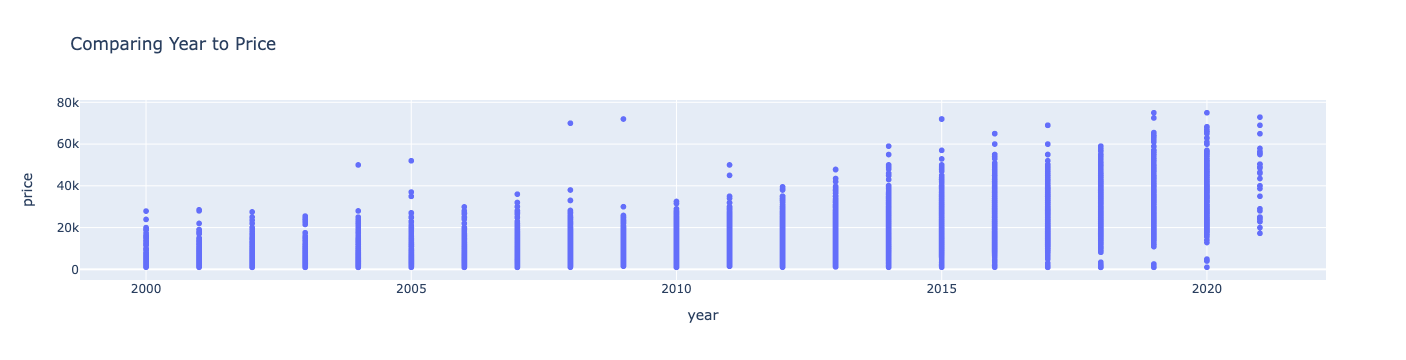

In [53]:
#As expected more recent vehicles typically cost more but there are exceptions
fig = px.scatter(data_frame=vehicles_df, x='year', y='price',title="Comparing Year to Price")
fig.show()

##### Explore the realtionship between Odometer and Price

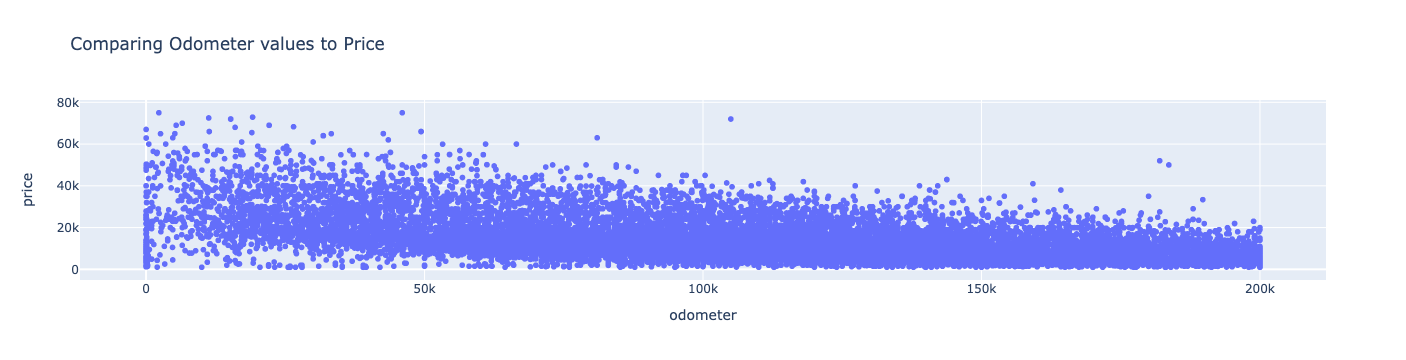

In [54]:
#There is an inverse relationship between Odometer and Price was some outliers
px.scatter(data_frame=vehicles_df, x='odometer', y='price',title="Comparing Odometer values to Price")

##### Explore the realtionship between State and Price

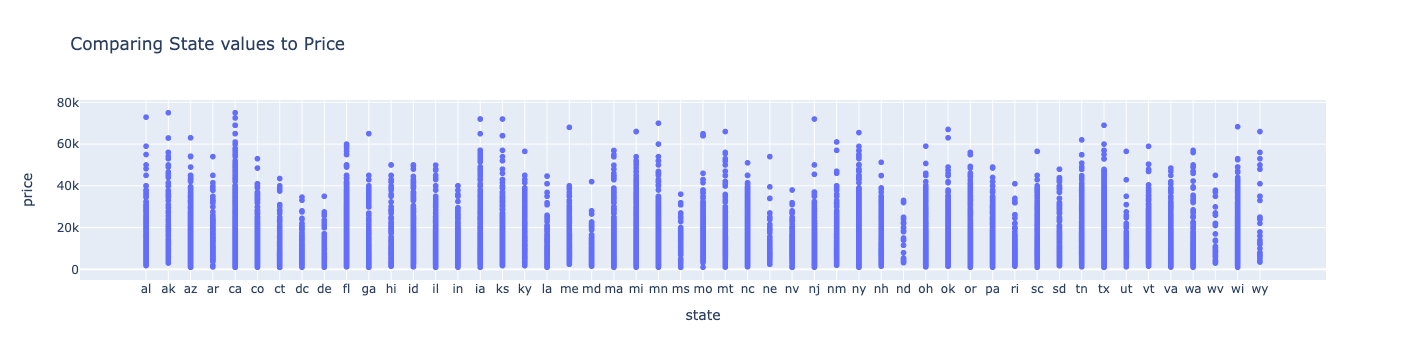

In [55]:
#There is not a clear relationship between state and price which is the reason to drop state for modeling consideration
px.scatter(data_frame=vehicles_df, x='state', y='price',title="Comparing State values to Price")

##### Data Selection
* Since fuel,title_status, transmission have all been limited to one value, they can be dropped for modeling purposes. State is also dropped since there isn't a strong correlation between state and price.

In [56]:
#generate train/test data excluding values not deemed useful for modeling
X = vehicles_df.drop(['price','fuel','title_status','transmission','state'],axis=1)
y = (vehicles_df['price'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

##### Train a Linear Regression model using year and odometer values and determine best order for Polynomials

In [57]:
features=['odometer','year']
train_mses = []
test_mses = []
#test for polynomials of degree 1-5
for i in range(1, 6):
    pipe = Pipeline([('poly_features',PolynomialFeatures(degree = i,include_bias=False)),('scaler', StandardScaler()), ('linreg', LinearRegression())])
    #fit on the training data
    pipe.fit(X_train[features], y_train)
    #predict model output for train and test datasets
    p1 = pipe.predict(X_train[features])
    p2 = pipe.predict(X_test[features])
    #determine MSE for train and test datasets
    train_mses.append(mean_squared_error(y_train, p1))
    test_mses.append(mean_squared_error(y_test, p2))

print(f'Train MSEs:' + str(["%.2f" % elem for elem in train_mses]))
print(f'Test MSEs:' + str(["%.2f" % elem for elem in test_mses]))


Train MSEs:['57164297.55', '53435091.45', '53275581.30', '52880392.87', '52570178.82']
Test MSEs:['59599283.19', '55058104.26', '54998374.10', '54618153.29', '54257809.87']


##### Order 2 had the nearly the best Test MSE so degree=2 will be used going forward inorder to minimize overfitting
##### Train a second order LinReg model for year and odometer and get coefficients

In [58]:
features=['odometer','year']
pipe = Pipeline([('poly_features',PolynomialFeatures(degree = 2,include_bias=False)),('scaler', StandardScaler()), ('linreg', LinearRegression())])
#fit on the training data
pipe.fit(X_train[features], y_train)
#predict model output for train and test datasets
p1 = pipe.predict(X_train[features])
p2 = pipe.predict(X_test[features])
#determine MSE for train and test datasets
train_mse = mean_squared_error(y_train, p1)
test_mse = mean_squared_error(y_test, p2)
print(f'Train MSE: {train_mse: ,.2f}')
print(f'Test MSE: {test_mse: ,.2f}')
#determine feature importance
feature_names = pipe.named_steps['poly_features'].get_feature_names_out()
linreg_df = pd.DataFrame({'feature': feature_names, 'coef': pipe.named_steps['linreg'].coef_})
linreg_df.loc[linreg_df['coef'] != 0]

Train MSE:  53,435,091.45
Test MSE:  55,058,104.26


feature          coef
0       odometer  1.178543e+04
1           year -1.386916e+06
2     odometer^2  1.550470e+03
3  odometer year -1.527450e+04
4         year^2  1.392079e+06

##### Train a Ridge Regression model using only first order year and odometer values to find the best Alpha and see if Ridge has a lower MSE than Linreg

In [59]:
features=['year','odometer']
pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(pipe, param_grid=param_dict)
model = grid.fit(X_train[features],y_train)
train_preds = model.best_estimator_.predict(X_train[features])
test_preds =  model.best_estimator_.predict(X_test[features])
#determine MSE for train and test datasets
model_train_mse = mean_squared_error(y_train,train_preds)
model_test_mse = mean_squared_error(y_test,test_preds)
#determine best Alpha for Ridge model
model_best_alpha = model.best_params_

print(f'Test MSE: {model_test_mse:,.2f}')
print(f'Best Alpha: {list(model_best_alpha.values())[0]}')

Test MSE: 59,599,942.13
Best Alpha: 10.0


##### Train a Ridge Regression model using second order year and odometer values to find the best Alpha and if Ridge has a lower MSE than LinReg

In [60]:
features=['year','odometer']
pipe = Pipeline([('scale', StandardScaler()),('poly_features',PolynomialFeatures(degree=2,include_bias=False)),('ridge', Ridge())])
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}

grid = GridSearchCV(pipe, param_grid=param_dict)
model = grid.fit(X_train[features],y_train)
train_preds = model.best_estimator_.predict(X_train[features])
test_preds =  model.best_estimator_.predict(X_test[features])
#determine MSE for train and test datasets
model_train_mse = mean_squared_error(y_train,train_preds)
model_test_mse = mean_squared_error(y_test,test_preds)
#determine best Alpha for Ridge model
model_best_alpha = model.best_params_

print(f'Test MSE: {model_test_mse:,.2f}')
print(f'Best Alpha: {list(model_best_alpha.values())[0]}')

Test MSE: 55,058,457.45
Best Alpha: 10.0


##### Train a Lasso model using 1st order year and odometer values to determine feature importance

In [61]:
features=['year','odometer']
pipe = Pipeline([('polyfeatures',PolynomialFeatures(degree=1,include_bias=False)),\
                      ('scaler',StandardScaler()),('lasso',Lasso())])
pipe.fit(X_train[features],y_train)

#determine MSE for train and test datasets
lasso_train_mse = float(mean_squared_error(pipe.predict(X_train[features]),y_train))
lasso_test_mse = float(mean_squared_error(pipe.predict(X_test[features]),y_test))

print(f'Train MSE: {lasso_train_mse: ,.2f}')
print(f'Test MSE: {lasso_test_mse: ,.2f}')

Train MSE:  57,164,298.69
Test MSE:  59,599,629.00


In [62]:
#determine feature importance
lasso_coefs = pipe.named_steps['lasso'].coef_
feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out()
lasso_df = pd.DataFrame({'feature': feature_names, 'coef': lasso_coefs})
lasso_df.loc[lasso_df['coef'] != 0]

feature         coef
0      year  4668.756609
1  odometer -2754.508294

##### Train a Lasso model using 2nd order year and odometer values and examine feature importance

In [63]:
features=['year','odometer']
pipe = Pipeline([('polyfeatures',PolynomialFeatures(degree=2,include_bias=False)),\
                      ('scaler',StandardScaler()),('lasso',Lasso(tol=1e-1))])
pipe.fit(X_train[features],y_train)

#determine MSE for train and test datasets
lasso_train_mse = float(mean_squared_error(pipe.predict(X_train[features]),y_train))
lasso_test_mse = float(mean_squared_error(pipe.predict(X_test[features]),y_test))

print(f'Train MSE: {lasso_train_mse: .2f}')
print(f'Test MSE: {lasso_test_mse: .2f}')


Train MSE:  56119991.70
Test MSE:  58103730.45


In [64]:
lasso_coefs = pipe.named_steps['lasso'].coef_
feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out()
lasso_df = pd.DataFrame({'feature': feature_names, 'coef': lasso_coefs})
lasso_df.loc[lasso_df['coef'] != 0]

feature         coef
0           year  7219.600081
1       odometer -5005.545109
2         year^2 -2525.467105
3  year odometer -1600.466774
4     odometer^2  3996.063513

##### Train a Lasso model using 1st order year and odometer values along with ordinal encoded cyclinders and condition values to determine feature importance

In [65]:
#transform condition and cylinder columns from low to high
ordinal_transformer = make_column_transformer((OrdinalEncoder(categories = [['fair','good','excellent','like new','new']]), ['condition']),
                                          (OrdinalEncoder(categories = [['4 cylinders','6 cylinders','8 cylinders']]), ['cylinders']),
                                          remainder='passthrough')

In [66]:
features=['year','odometer','cylinders','condition']
pipe = Pipeline([('tranformer',ordinal_transformer),('polyfeatures',PolynomialFeatures(degree=1,include_bias=False)),\
                      ('scaler',StandardScaler()),('lasso',Lasso(tol=1e-1))])

pipe.fit(X_train[features],y_train)

lasso_train_mse = float(mean_squared_error(pipe.predict(X_train[features]),y_train))
lasso_test_mse = float(mean_squared_error(pipe.predict(X_test[features]),y_test))

print(f'Train MSE: {lasso_train_mse: ,.2f}')
print(f'Test MSE: {lasso_test_mse: ,.2f}')

Train MSE:  33,721,860.41
Test MSE:  35,284,718.09


In [67]:
lasso_coefs = pipe.named_steps['lasso'].coef_
feature_names = pipe.named_steps['polyfeatures'].get_feature_names_out()

lasso_df = pd.DataFrame({'feature': features, 'coef': lasso_coefs})
lasso_df.loc[lasso_df['coef'] != 0]

feature         coef
0       year   579.040713
1   odometer  4873.401060
2  cylinders  5157.535913
3  condition -2962.562161

##### RESULTS: When trained on only year, odometer, cylinders, and condition, the most important feature was cylinders followed by odometer,condition and year

##### Transform categorical features to numerical values for modeling
* Ordinal Endode Condition and Cylinder Features from low to high
* One hot encode the categorical features

In [68]:
ordinal__ohe_transformer = make_column_transformer((OrdinalEncoder(categories = [['fair','good','excellent','like new','new']]), ['condition']),
                                          (OrdinalEncoder(categories = [['4 cylinders','6 cylinders','8 cylinders']]), ['cylinders']),
                                          (OneHotEncoder(),make_column_selector(dtype_include=object)),
                                          remainder='passthrough')

##### Create LinReg models for the numerical features + one of the categorical feature at a time and then compare MSEs

In [69]:
numerical_features=['odometer','cylinders','condition','year']
categorical_features=['manufacturer','model','drive', 'type','paint_color']
features=[]
train_mses = []
test_mses = []
features=['year','odometer','model','manufacturer']
for f in categorical_features:
    features = numerical_features +[f]

    poly_ordinal_ohe = make_column_transformer((PolynomialFeatures(degree = 2), make_column_selector(dtype_include=np.number),('scaler',StandardScaler())),\
                                                (OneHotEncoder(drop = 'if_binary'), make_column_selector(dtype_include=object)))
    pipe = Pipeline([('transformer', poly_ordinal_ohe), ('linreg', LinearRegression())])

    pipe.fit(X_train[features], y_train)
    #fit on train
    p1 = pipe.predict(X_train[features])
    p2 = pipe.predict(X_test[features])
    #predict on train and test
    train_mses.append(mean_squared_error(y_train, p1))
    test_mses.append(mean_squared_error(y_test, p2))

out_df = pd.DataFrame({'feature': categorical_features, 'test mse': test_mses})
print(out_df)

        feature      test mse
0  manufacturer  5.804654e+07
1         model  5.804654e+07
2         drive  2.919599e+07
3          type  2.904573e+07
4   paint_color  3.211459e+07


##### RESULTS: When combined with: [odometer,cylinders,condition,year],type was the most important feature followed by drive,paint_color, model and manufacturer.

##### Create LinReg model for each of the  features trained one at a time and then compare MSEs

In [70]:
all_features=['odometer','cylinders','condition','year','manufacturer','model','drive', 'type','paint_color']
features=[]
train_mses = []
test_mses = []
features=[]
#Iterate through all of the features, and store the MSE for each
for f in all_features:
    features = [f]

    poly_ordinal_ohe = make_column_transformer((PolynomialFeatures(degree = 2), make_column_selector(dtype_include=np.number),('scaler',StandardScaler())),\
                                                (OneHotEncoder(drop = 'if_binary'), make_column_selector(dtype_include=object)))
    pipe = Pipeline([('transformer', poly_ordinal_ohe), ('linreg', LinearRegression())])
    #fit on the training features
    pipe.fit(X_train[features], y_train)
    #fit on the train and test features
    p1 = pipe.predict(X_train[features])
    p2 = pipe.predict(X_test[features])
    #add mses for each model that was created for the individual features
    train_mses.append(mean_squared_error(y_train, p1))
    test_mses.append(mean_squared_error(y_test, p2))

out_df = pd.DataFrame({'feature': all_features, 'test mse': test_mses})
print(out_df)

        feature      test mse
0      odometer  7.344672e+07
1     cylinders  9.004774e+07
2     condition  9.834693e+07
3          year  5.812011e+07
4  manufacturer  9.432797e+07
5         model  7.029379e+07
6         drive  8.922717e+07
7          type  8.430911e+07
8   paint_color  1.036411e+08


##### RESULTS: When modeled individually,the order of feature importance was year,model,odometer,type,drive,cylinders,manufacuturer, condition and paint color.

##### Similar to above above where I created a LinReg model for each of the  features trained one at a time and then compare MSEs, but now varying the degree of the Polynomial Transformer

In [71]:
all_features=['odometer','cylinders','condition','year','manufacturer','model','drive', 'type','paint_color']
#for a range of Polynomial degree from 1-5
for i in range(1, 6):
    train_mses = []
    test_mses = []
    features=[]
    #for each feature, build a LinReg model
    for f in all_features:
        features = [f]
        #print (features)
        poly_ordinal_ohe = make_column_transformer((PolynomialFeatures(degree = i), make_column_selector(dtype_include=np.number)),
                                                    (OneHotEncoder(drop = 'if_binary'), make_column_selector(dtype_include=object)))
        pipe = Pipeline([('transformer', poly_ordinal_ohe), ('linreg', LinearRegression())])
        #fit on training data
        pipe.fit(X_train[features], y_train)
        #predict on test and train datasets
        p1 = pipe.predict(X_train[features])
        p2 = pipe.predict(X_test[features])
        #predict on train and test
        train_mses.append(mean_squared_error(y_train, p1))
        test_mses.append(mean_squared_error(y_test, p2))

    #print(train_mses)
    #print(test_mses)
    print('Degree: ',i) 
    out_df = pd.DataFrame({'feature': all_features, 'test mse': test_mses})
    print(out_df)

Degree:  1
        feature      test mse
0      odometer  7.474012e+07
1     cylinders  9.004774e+07
2     condition  9.834693e+07
3          year  6.539313e+07
4  manufacturer  9.432797e+07
5         model  7.029379e+07
6         drive  8.922717e+07
7          type  8.430911e+07
8   paint_color  1.036411e+08
Degree:  2
        feature      test mse
0      odometer  7.344672e+07
1     cylinders  9.004774e+07
2     condition  9.834693e+07
3          year  5.812011e+07
4  manufacturer  9.432797e+07
5         model  7.029379e+07
6         drive  8.922717e+07
7          type  8.430911e+07
8   paint_color  1.036411e+08
Degree:  3
        feature      test mse
0      odometer  7.338596e+07
1     cylinders  9.004774e+07
2     condition  9.834693e+07
3          year  5.781328e+07
4  manufacturer  9.432797e+07
5         model  7.029379e+07
6         drive  8.922717e+07
7          type  8.430911e+07
8   paint_color  1.036411e+08
Degree:  4
        feature      test mse
0      odometer  7.289480e

##### RESULTS: Regardless of Polynomial order between 1-5, when modeled individually,the order of feature importance was still year,model,odometer,type,drive,cylinders,manufacuturer, condition and paint color.

##### Create Ridge model with Alpah=10 for the numerical features + one of the categorical feature at a time and then compare MSEs

In [72]:
all_features=['odometer','cylinders','condition','year','manufacturer','model','drive', 'type','paint_color']
features=[]
train_mses = []
test_mses = []
features=[]
for f in all_features:
    features = [f]

    poly_ordinal_ohe = make_column_transformer((PolynomialFeatures(degree = 2), make_column_selector(dtype_include=np.number),('scaler',StandardScaler())),\
                                                (OneHotEncoder(drop = 'if_binary'), make_column_selector(dtype_include=object)))
    pipe = Pipeline([('transformer', poly_ordinal_ohe), ('Ridge', Ridge(alpha=10))])
    #fit on training data
    pipe.fit(X_train[features], y_train)
    #predict on train and test
    p1 = pipe.predict(X_train[features])
    p2 = pipe.predict(X_test[features])
    
    train_mses.append(mean_squared_error(y_train, p1))
    test_mses.append(mean_squared_error(y_test, p2))

out_df = pd.DataFrame({'feature': all_features, 'test mse': test_mses})
print(out_df)

        feature      test mse
0      odometer  7.344672e+07
1     cylinders  9.005469e+07
2     condition  9.835437e+07
3          year  6.455408e+07
4  manufacturer  9.435514e+07
5         model  7.113244e+07
6         drive  8.922986e+07
7          type  8.432371e+07
8   paint_color  1.036263e+08


/Users/mikewalker/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=5.46702e-24): result may not be accurate.



##### RESULTS: Similar to the LinReg model where the order of feature importance was year,model,odometer,type,drive,cylinders,manufacuturer,condition and paint color.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Summary of Modeling Results
* Explored LinReg models of Polynomial 1-5, and determined degree=2 to be the best option while minimizing complexity
* Explored Ridge models and determined 10 was the best Alpha parm
* When each feature was modeled individually against the target Price, the order of feature importance was:
1) year
2) model
3) odometer
4) type
5) drive
6) cylinders
7) manufacuturer
8) condition
9) paint color.
* This held true regardless of model types (LinReg/Ridge) and Polynomial values  

In [73]:
#Permutation importance -https://scikit-learn.org/stable/modules/permutation_importance.html

In [74]:
#https://christophm.github.io/interpretable-ml-book/limo.html - plotting feature importance including categorical

In [75]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html - ohe Docs options

In [76]:
#ohe examples - https://vitalflux.com/one-hot-encoding-concepts-python-code-examples/

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.